In [2]:
import pandas as pd

# El '../' significa: "sal de la carpeta notebooks y entra en la carpeta data"
df = pd.read_csv('../data/viviendas.csv')

# Esto nos muestra las primeras 5 casas de tu lista
print("¡Datos cargados con éxito!")
df.head()

¡Datos cargados con éxito!


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
# Ver el resumen de columnas y si faltan datos
df.info()

# Ver estadísticas (promedio de precios, valor mínimo y máximo)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


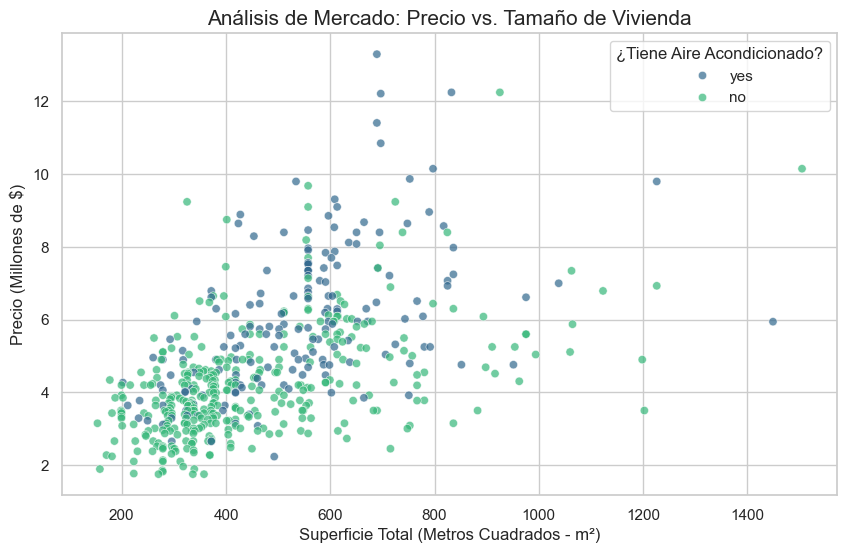

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creamos una copia para no alterar el DataFrame original
df_metrics = df.copy()

# Factor de conversion: 1 pie cuadrado = 0.0929 metros cuadrados
conversion_factor = 0.092903
df_metrics['area_m2'] = df_metrics['area'] * conversion_factor

# Precio en millones para legibilidad
df_metrics['price_millions'] = df_metrics['price'] / 1000000

# 2. Configuracion del Grafico
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")


plot = sns.scatterplot(
    data=df_metrics, 
    x='area_m2', 
    y='price_millions', 
    hue='airconditioning', 
    palette='viridis',
    alpha=0.7
)

# 3. Salida de datos
plt.title('Análisis de Mercado: Precio vs. Tamaño de Vivienda', fontsize=15)
plt.xlabel('Superficie Total (Metros Cuadrados - m²)', fontsize=12)
plt.ylabel('Precio (Millones de $)', fontsize=12)
plt.legend(title='¿Tiene Aire Acondicionado?')

plt.show()